In [5]:
from __future__ import division, print_function, absolute_import
from tmm import (coh_tmm, unpolarized_RT, ellips,position_resolved, find_in_structure_with_inf)
from numpy import pi, linspace, inf, array
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
try:
    import colorpy.illuminants
    import colorpy.colormodels
    from tmm import color
    colors_were_imported = True
except ImportError:
    # without colorpy, you can't run sample5(), but everything else is fine.
    colors_were_imported = False
    
# "5 * degree" is 5 degrees expressed in radians
# "1.2 / degree" is 1.2 radians expressed in degrees
degree = pi/180

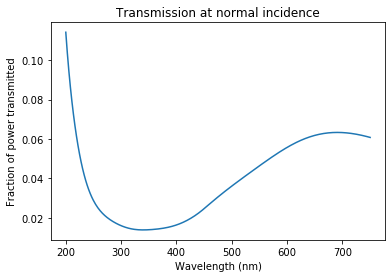

In [38]:
#index of refraction of my material: wavelength in nm versus index.
material_nk_data = array([[200, 2.1+0.1j],
                          [300, 2.4+0.3j],
                          [400, 2.3+0.4j],
                          [500, 2.2+0.4j],
                          [750, 2.2+0.5j]])
material_nk_fn = interp1d(material_nk_data[:,0].real,
                          material_nk_data[:,1], kind='quadratic')
d_list = [inf,300,inf] #in nm
lambda_list = linspace(200,750,400) #in nm
T_list = []
for lambda_vac in lambda_list:
    n_list = [1, material_nk_fn(lambda_vac), 1]
    T_list.append(coh_tmm('s',n_list,d_list,0,lambda_vac)['T'])
plt.figure()
plt.plot(lambda_list,T_list)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Fraction of power transmitted')
plt.title('Transmission at normal incidence');